 46%|████▌     | 6/13 [00:11<00:13,  1.87s/it]C:\tools\Anaconda3\envs\vvenv\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
100%|██████████| 13/13 [00:26<00:00,  2.07s/it]


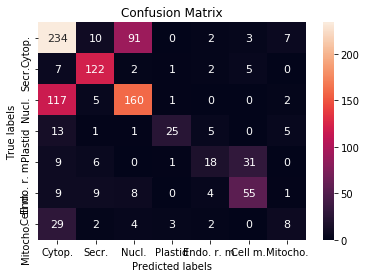

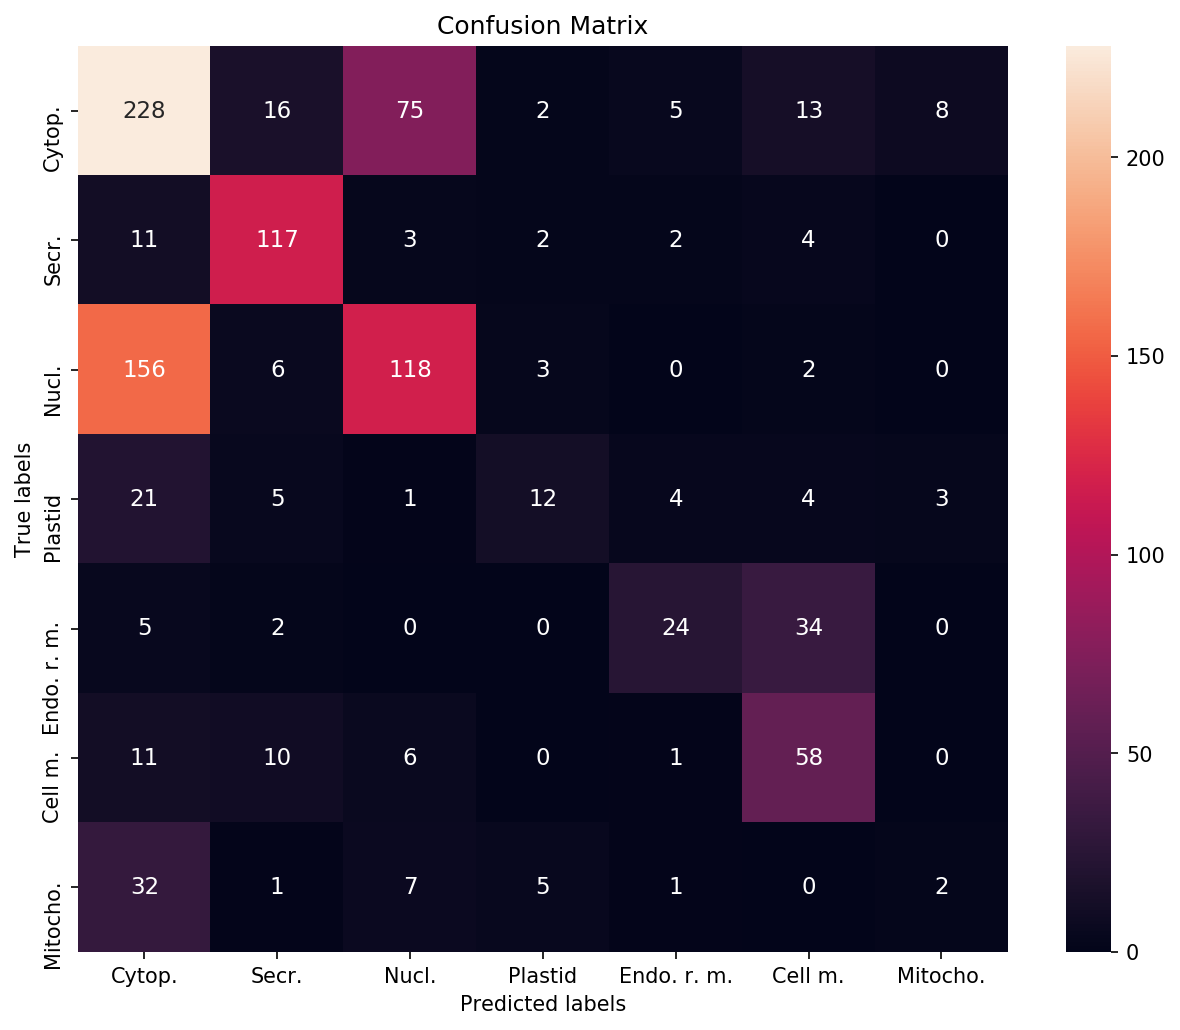

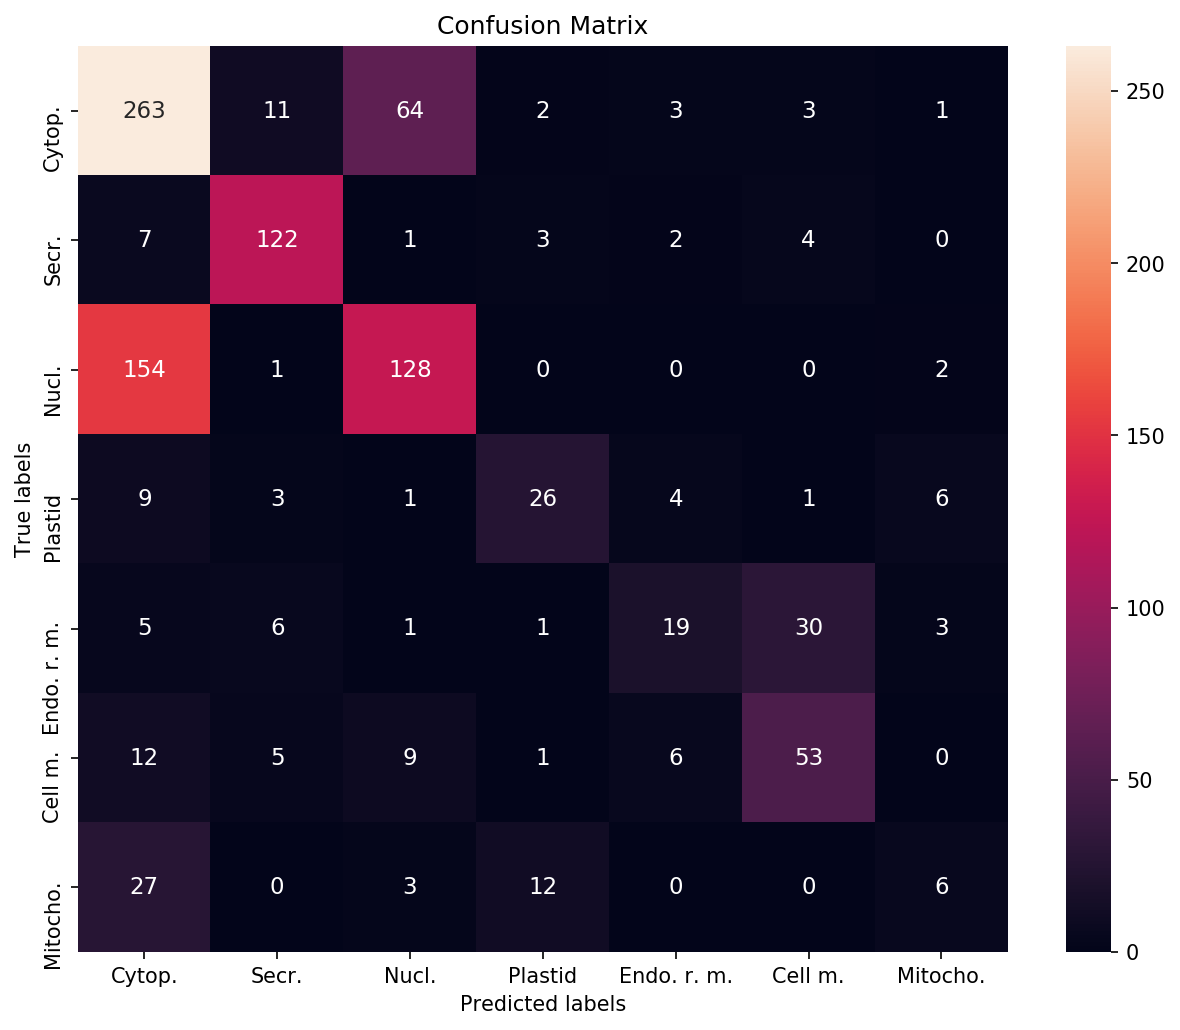

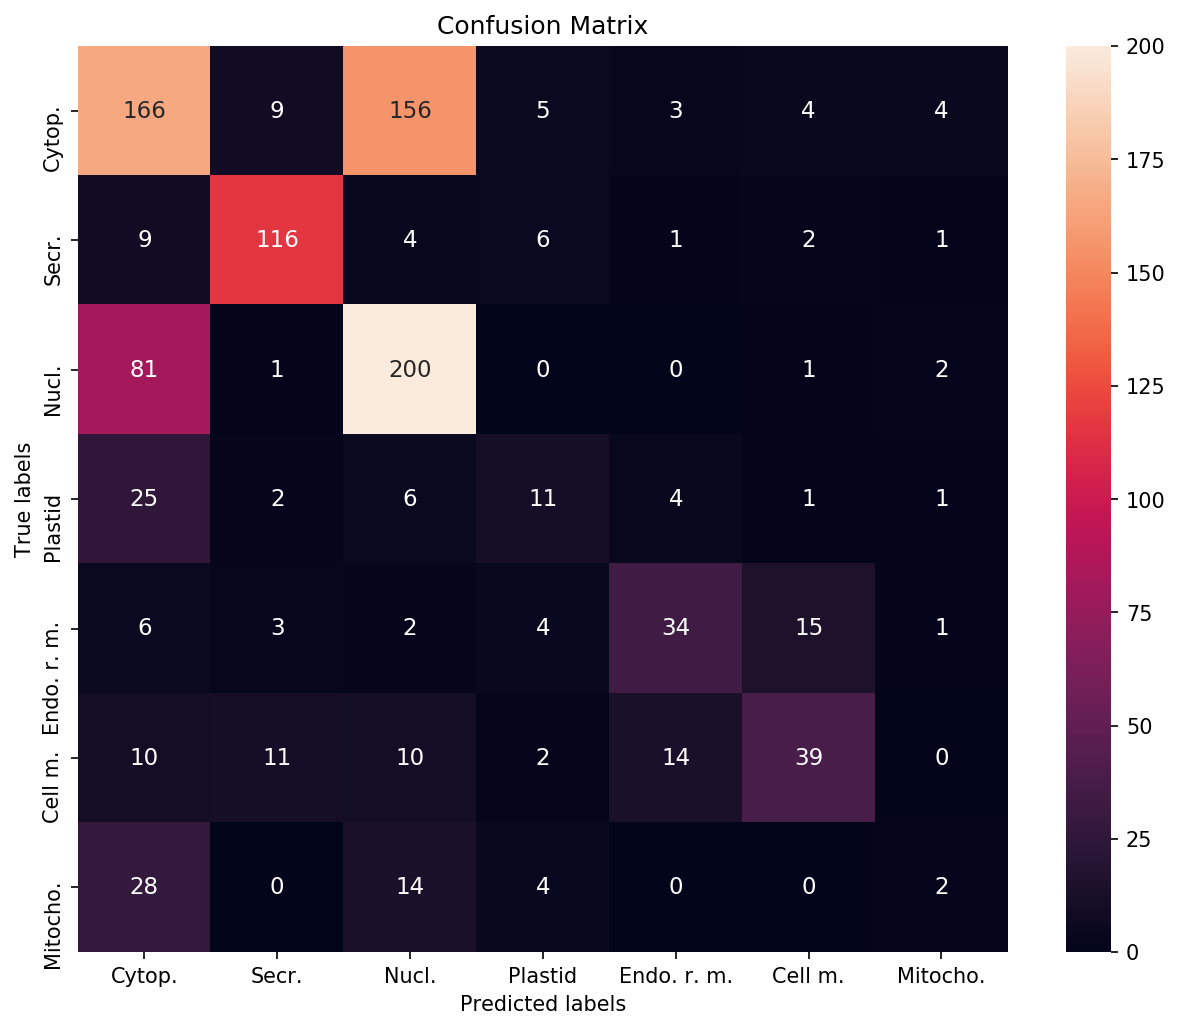

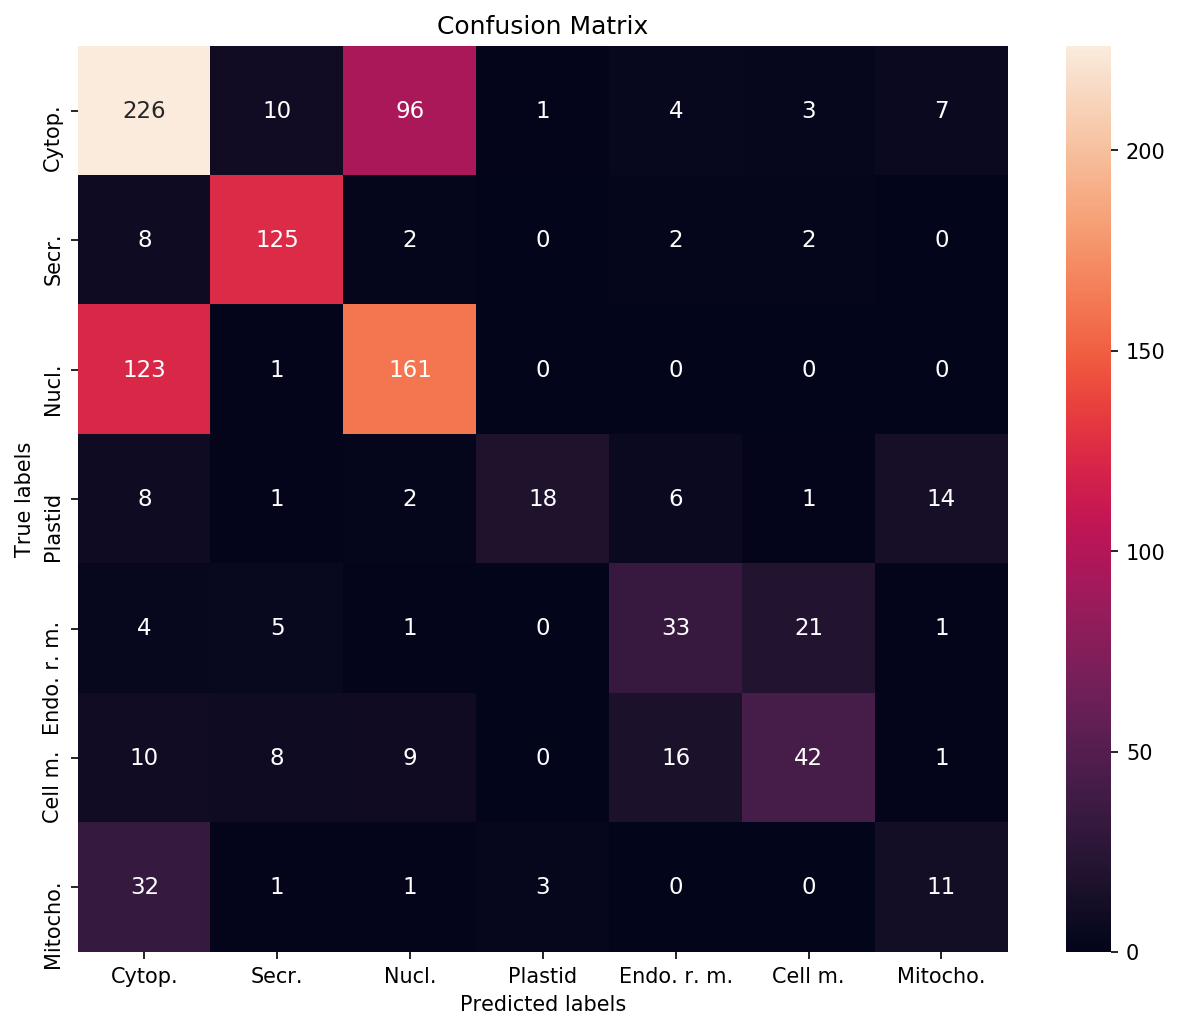

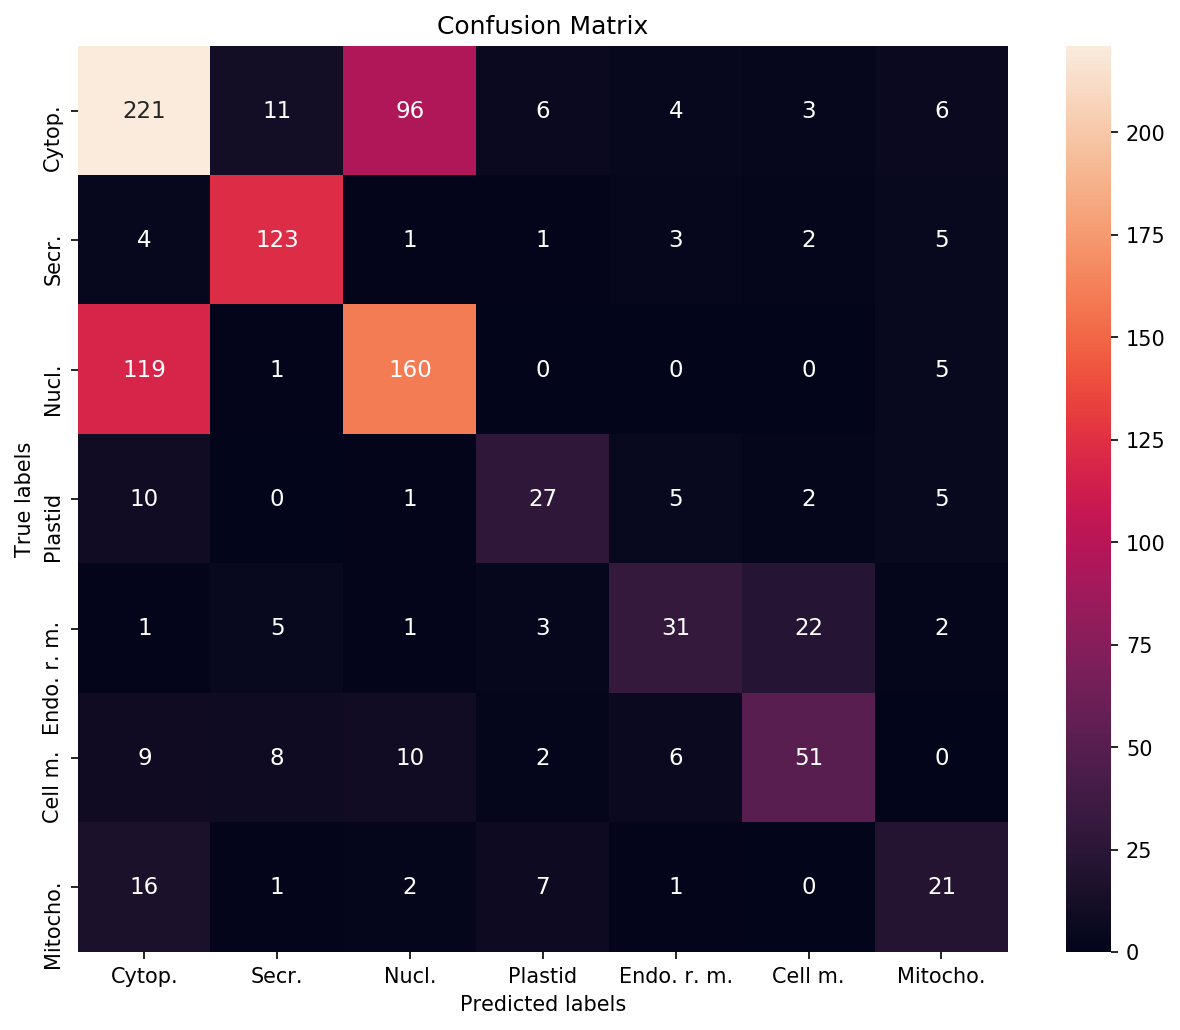

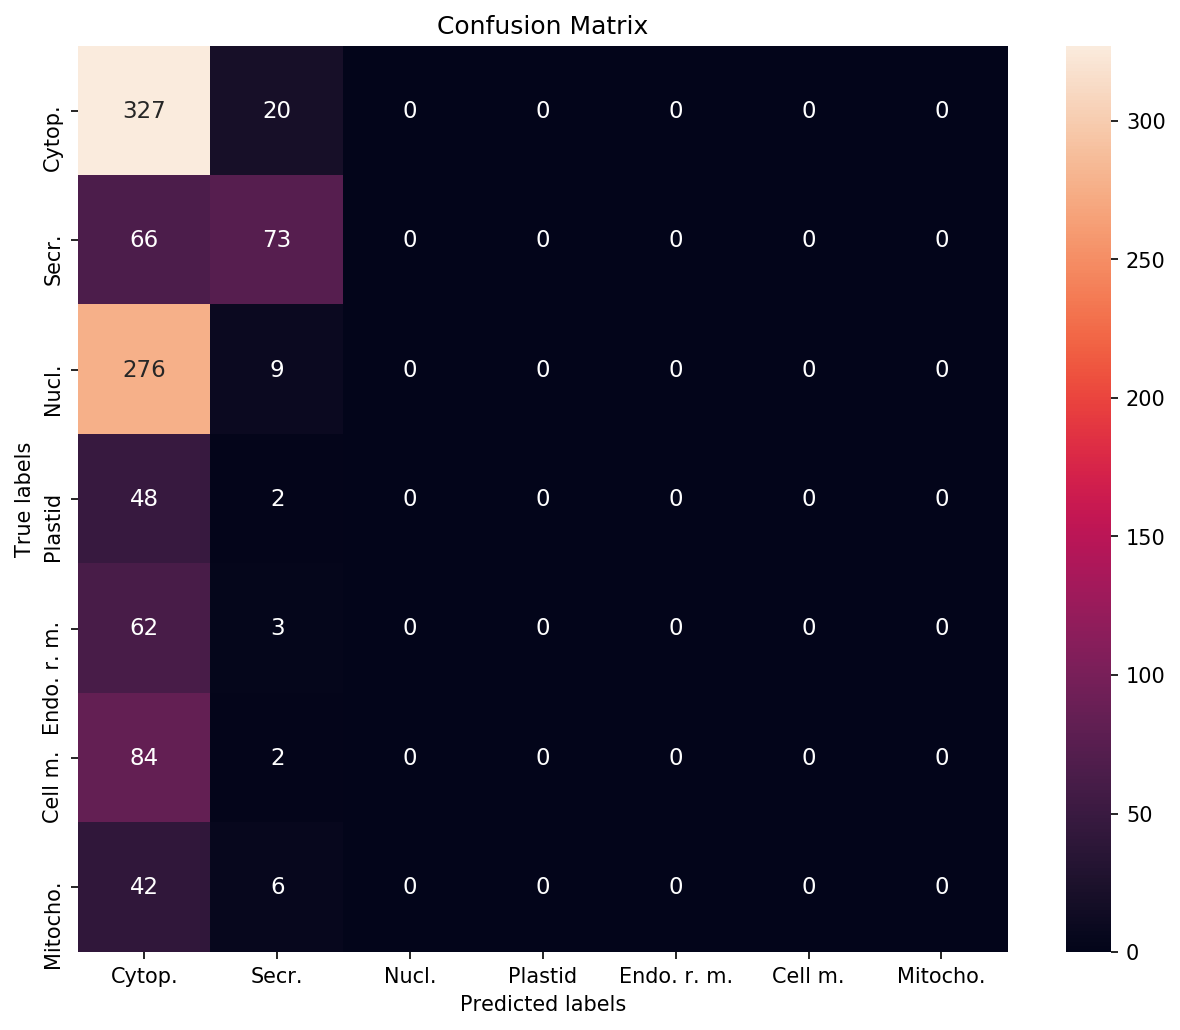

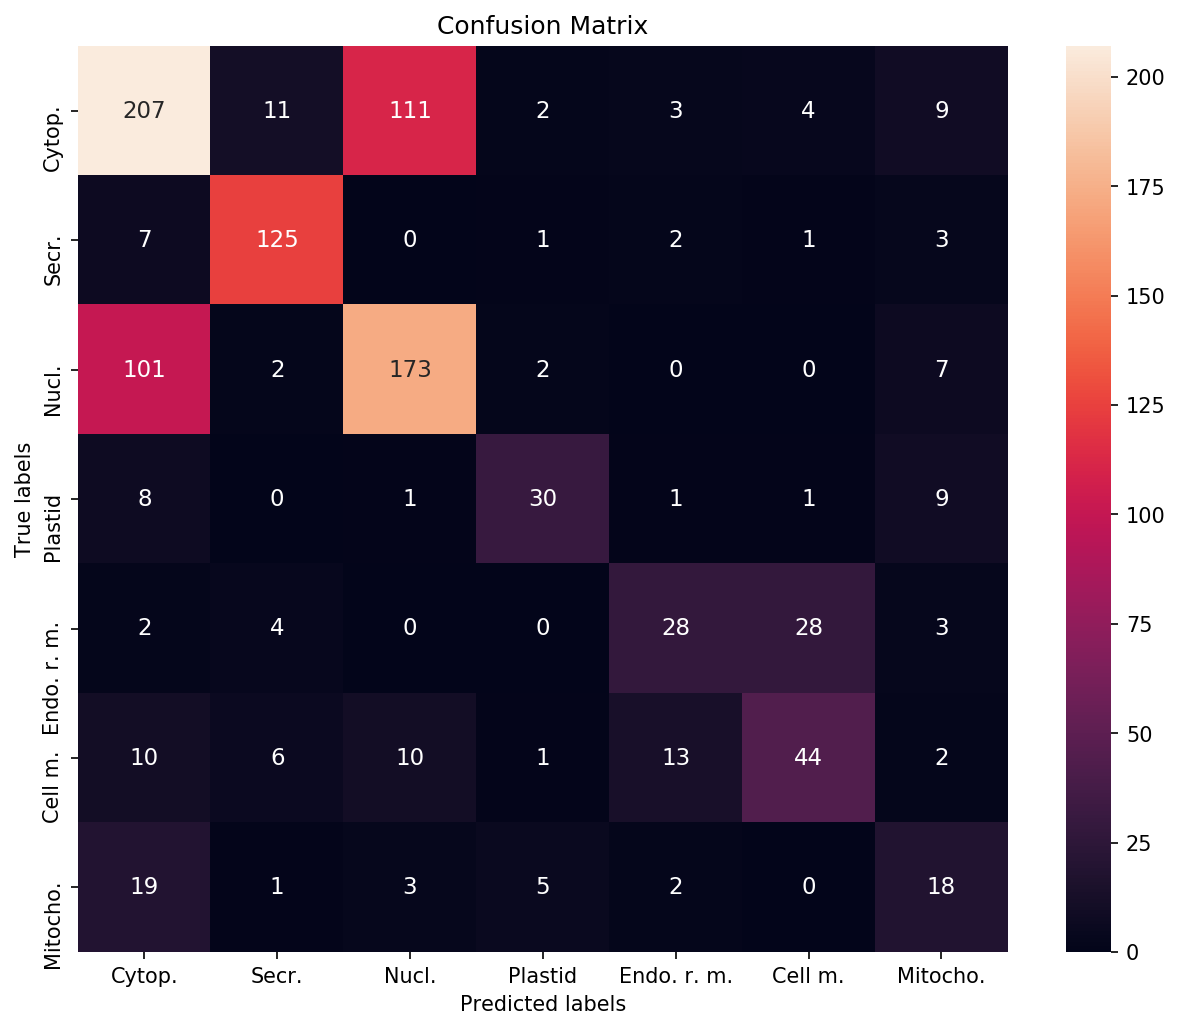

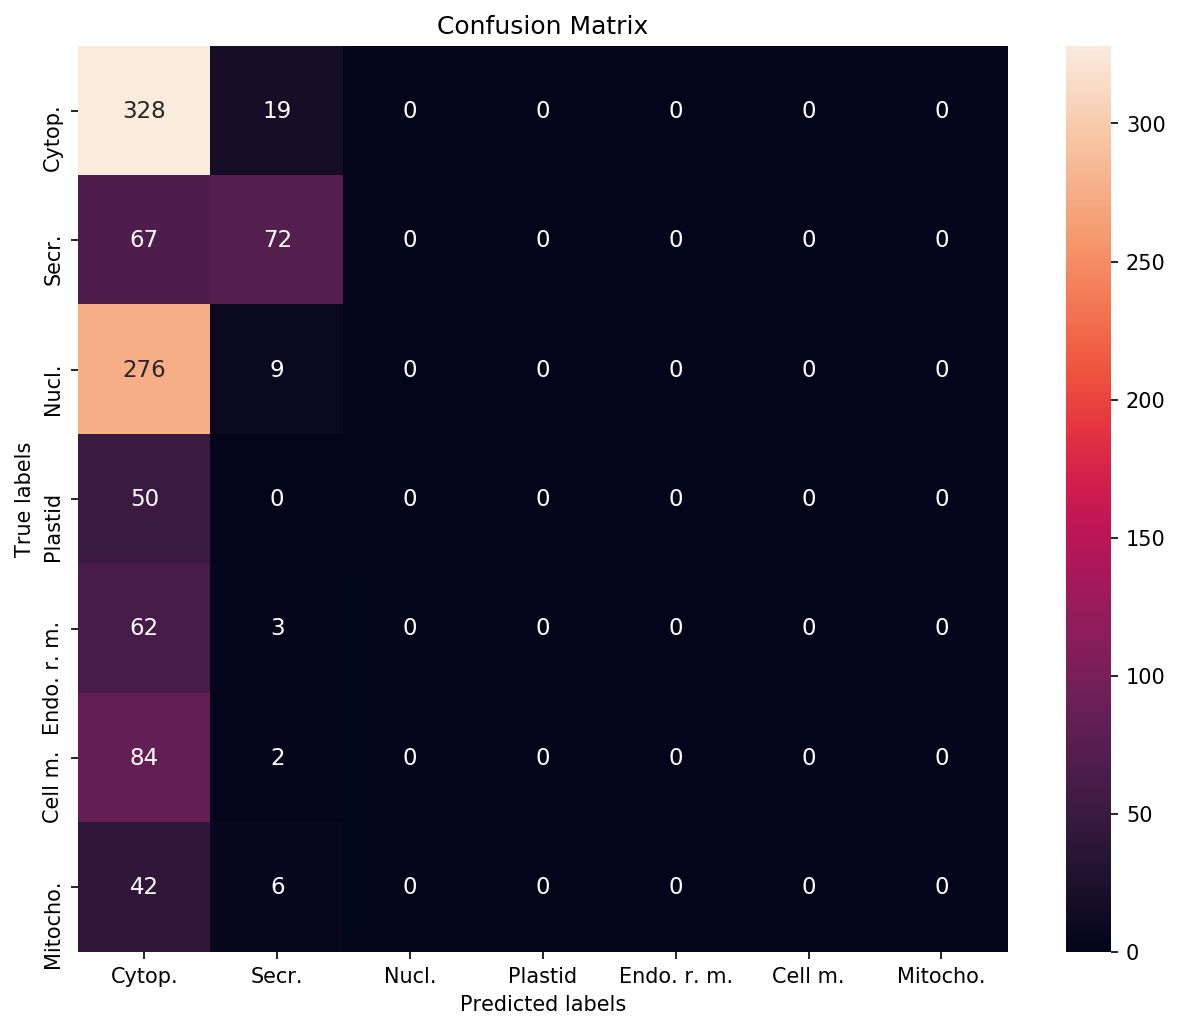

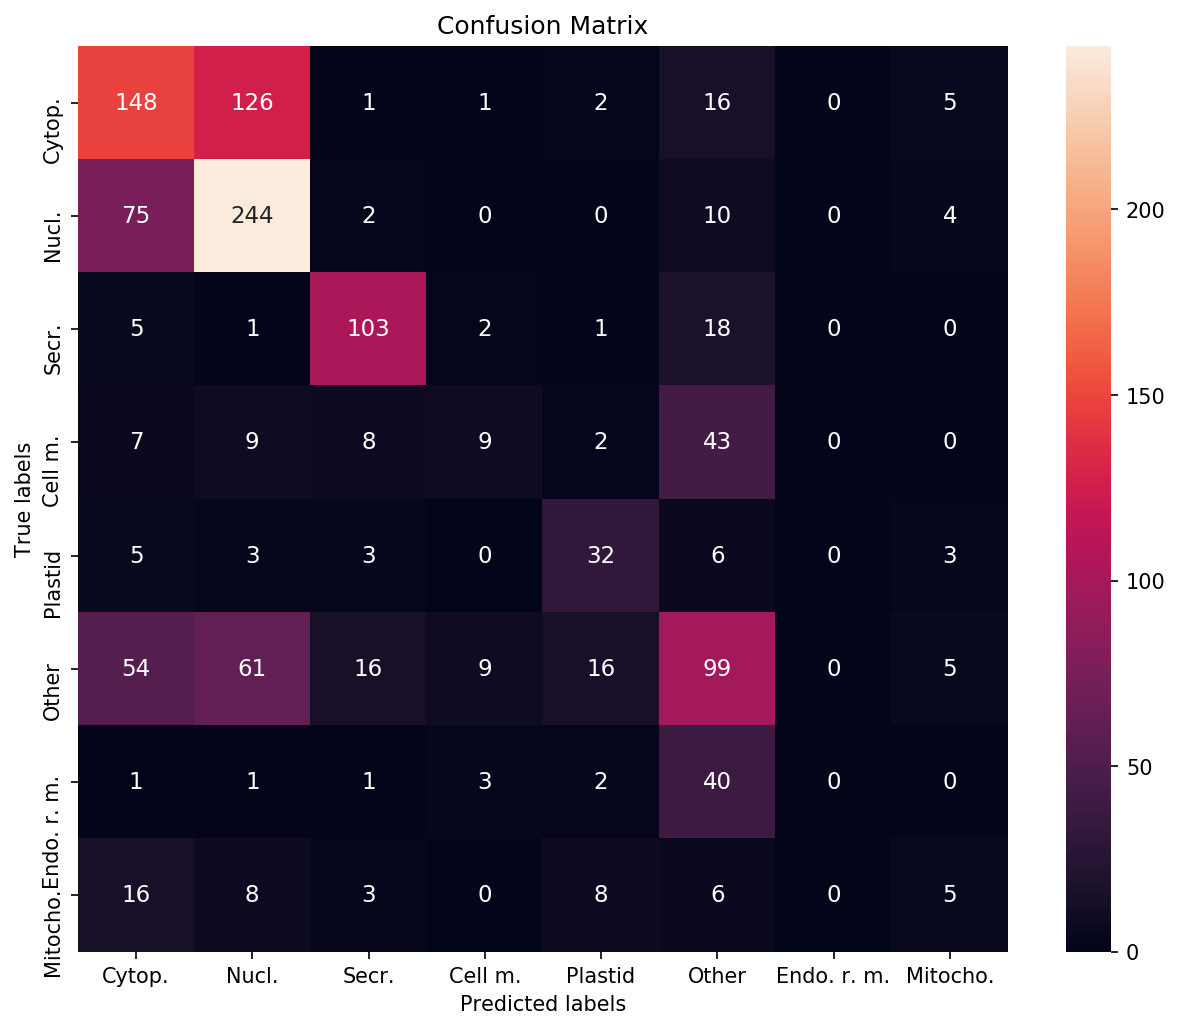

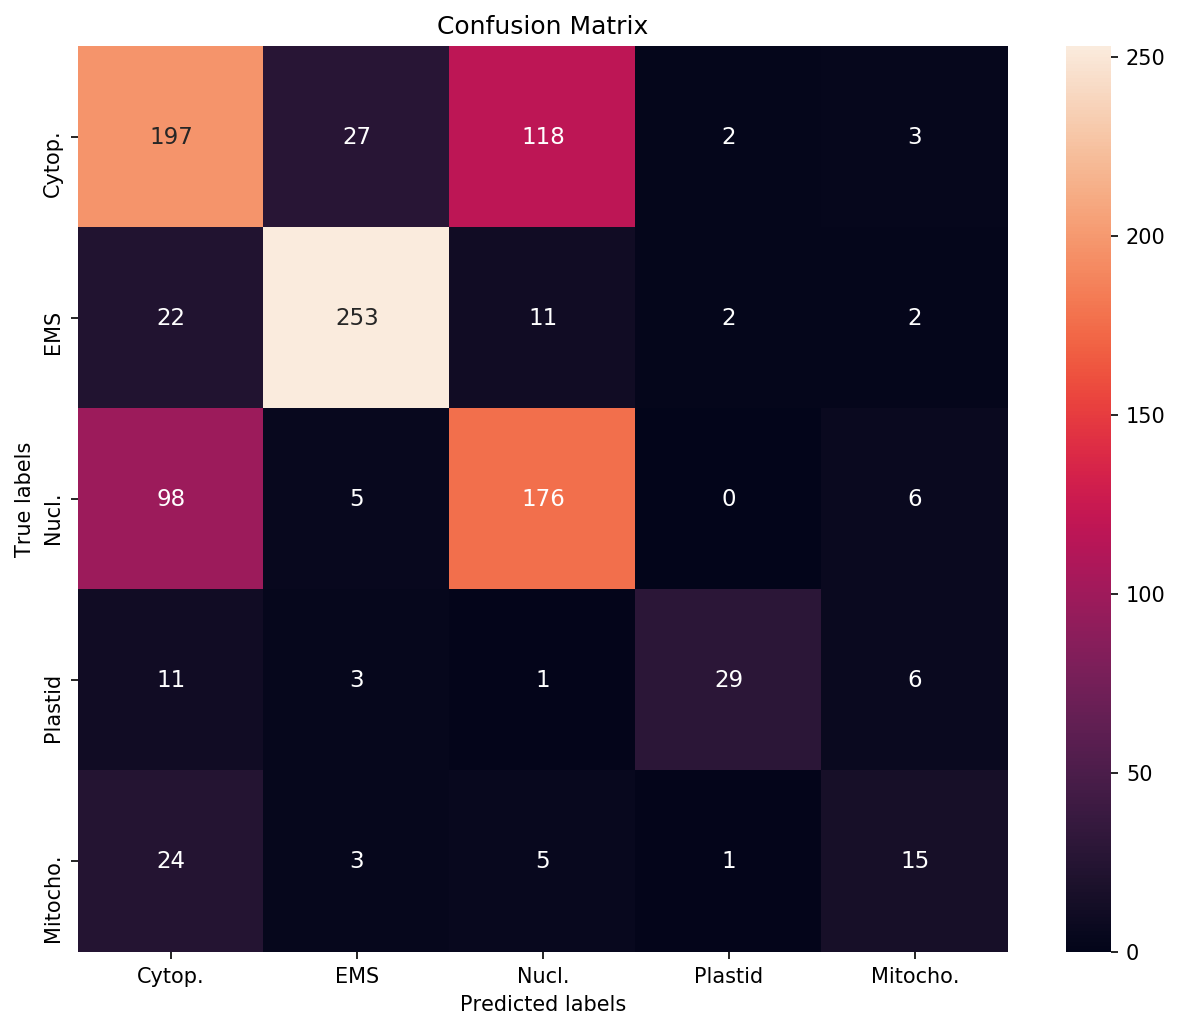

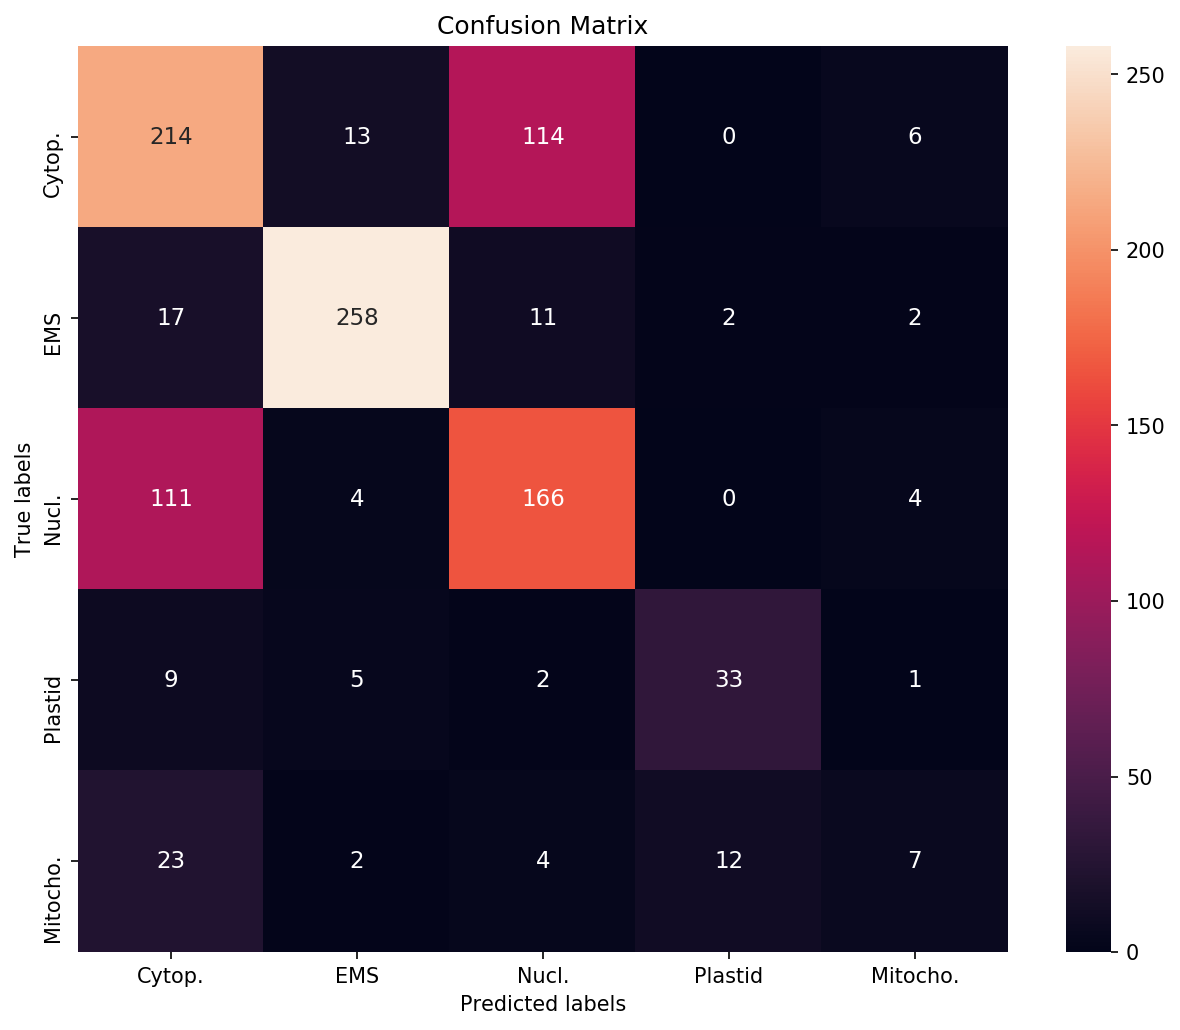

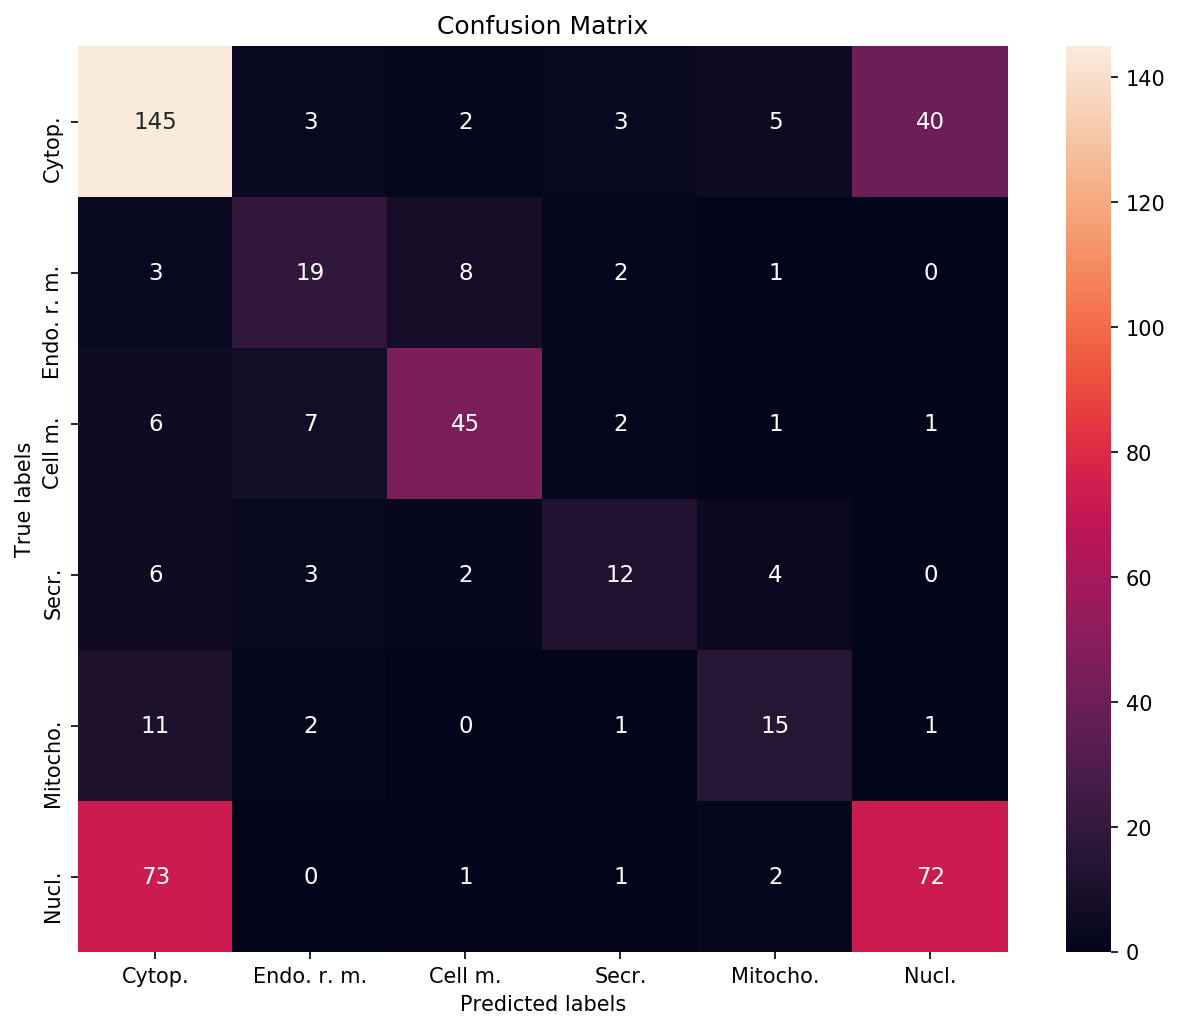

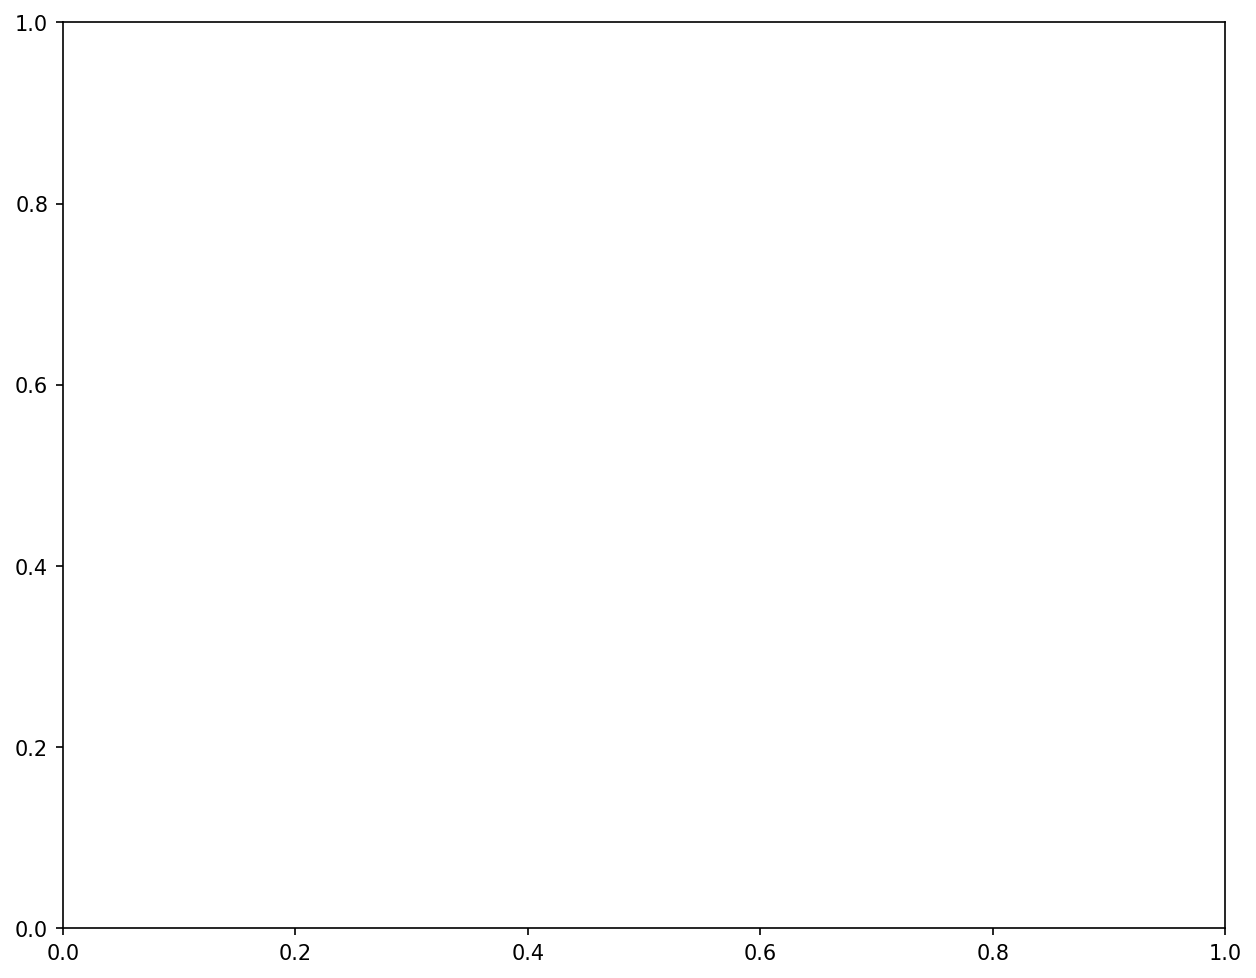

In [2]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure 
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sn
from tqdm import tqdm
from sklearn import metrics
import os

names = ['all_msa_1l', 'all_nomsa_1l', 'all_msa_2l', 'all_nomsa_2l', 'all_msa_2l_20_15', 'all_msa_3l', 'all_nomsa_3l', 'all_msa_3l_20', 'all_msa_4l', 'all+other_msa_2l', 'all_ems', 'all_ems_3l', 'all_hum_fun_MSA']
results = open(os.path.join('metrics', 'results.txt'),'w+')

seven_cm = {0 : "Cytop.", 1 : "Nucl.", 2 : "Secr.", 3 : "Cell m.", 4 : "Endo. r. m.", 5 : "Plastid", 6 : "Mitocho.", 7 : "Other"}
five_cm = {0 : "Cytop.", 1 : "Nucl.", 2 : "EMS", 3 : "Plastid", 4 : "Mitocho."}
six_cm = {0 : "Cytop.", 1 : "Nucl.", 2 : "Secr.", 3 : "Cell m.", 4 : "Endo. r. m.", 5 : "Mitocho."}

for name in tqdm(names, total= len(names)):
    preds = open(os.path.join('metrics', f'{name}.predictions'),'r')

    df = pd.DataFrame(columns=['name', 'actual', 'predicted'])

    k = 0
    c = 1
    for line in preds.readlines():
        line=line.rstrip('\n')
        if c % 6 == 2:
            df.at[k, 'name'] = line
        if c % 6 == 4:
            df.at[k, 'actual'] = f"{int(line)}"
        if c % 6 == 5:
            df.at[k, 'predicted'] = f"{int(line)}"
            k += 1
        c += 1
        
    labels = df.actual.unique().tolist()

    if len(labels) == 5:
        df['actual'] = df['actual'].apply(lambda x : five_cm[int(x)])
        df['predicted'] = df['predicted'].apply(lambda x : five_cm[int(x)])
    elif len(labels) == 6:
        df['actual'] = df['actual'].apply(lambda x : six_cm[int(x)])
        df['predicted'] = df['predicted'].apply(lambda x : six_cm[int(x)])
    elif len(labels) > 6:
        df['actual'] = df['actual'].apply(lambda x : seven_cm[int(x)])
        df['predicted'] = df['predicted'].apply(lambda x : seven_cm[int(x)])
    
    labels = df.actual.unique().tolist()
    y_true = df['actual']
    y_pred = df['predicted']
    
    results.write(f'+-----------------{name}-----------------+\n')
    results.write("{}\ncohen_kappa_score: {:2.2f}".format(str(metrics.classification_report(y_true, y_pred, digits=2)), metrics.cohen_kappa_score(y_true, y_pred)))

    cm = confusion_matrix(y_true, y_pred, labels= labels)
    
    ax= plt.subplot()
    ax.set_title('Confusion Matrix')
    figure(num=None, figsize=(10, 8), dpi=150, facecolor='w', edgecolor='k')
    svm = sn.heatmap(cm, annot=True, annot_kws={"size": 11}, fmt='g', ax = ax)
    ax.set_xticklabels(labels) 
    ax.set_yticklabels(labels) 
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    _, labels = plt.yticks()
    plt.setp(labels, rotation=0)
    
    fig = svm.get_figure()    
    fig.savefig(f'images/conf_m_{name}.png', dpi=400)
    results.write('+--------------------END--------------------+\n')
    preds.close()